In [1]:
from time import time
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import gpr
import mcmc
import forAustin as fa

In [2]:
datafile = '/data4/paper/fox/DES/austinFull.fits'
nExposure = 500
# sample = np.array([-0.4, 0, 0, 0.4])
sample = None
GP = gpr.GPR(datafile, nExposure, sample=sample, verbose=False, eps=0, test_size=0.2, random_state=0)

In [3]:
def LML(GP, theta):
    GP.fit(theta)
    LML = GP.get_LML()
    return LML

In [4]:
var_s = 100
sigma_x = ((5 * u.arcmin).to(u.deg)).value
sigma_y = sigma_x
phi = (0 * u.deg).to(u.rad).value
theta0 = np.array([var_s, sigma_x, sigma_y, phi])
step_size = np.array([1e-1, 1e-3, 1e-3, 1e-7])
names = np.array(['var_s', 'sigma_x', 'sigma_y', 'phi'])

In [5]:
estimator = mcmc.MCMC(LML, GP, theta0, step_size, names=names, seed=0)

In [6]:
%%time
# estimator.clear(step_size=step_size)
# estimator.burn(100)
estimator.run(10)

CPU times: user 2h 30min 49s, sys: 7min 5s, total: 2h 37min 54s
Wall time: 14min 30s


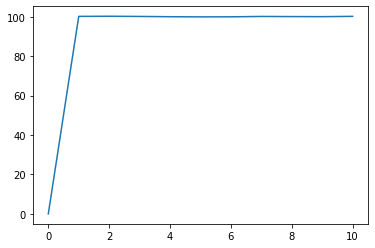

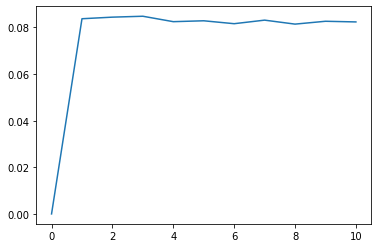

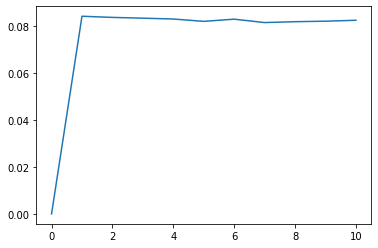

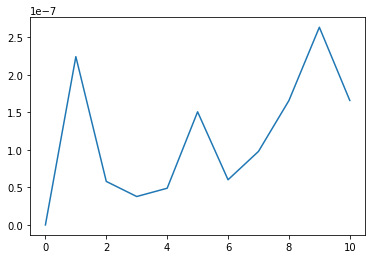

In [7]:
plt.plot(estimator.theta_news[:, 0])
plt.show()
plt.plot(estimator.theta_news[:, 1])
plt.show()
plt.plot(estimator.theta_news[:, 2])
plt.show()
plt.plot(estimator.theta_news[:, 3])
plt.show()

0.4
-4653748.290417168


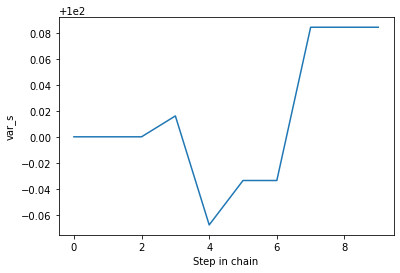

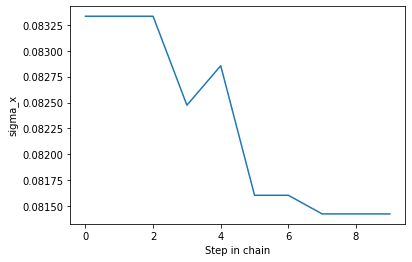

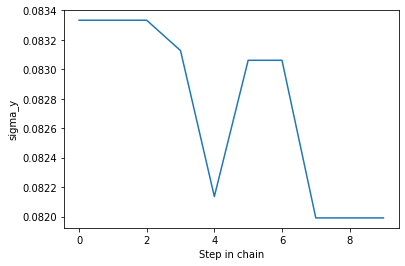

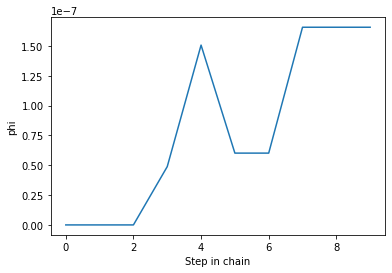

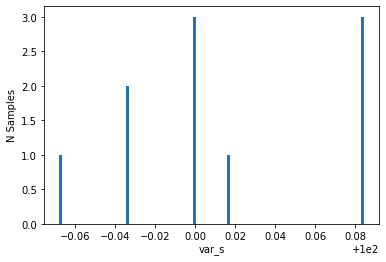

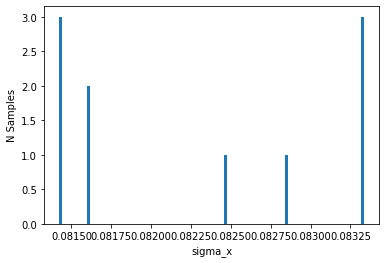

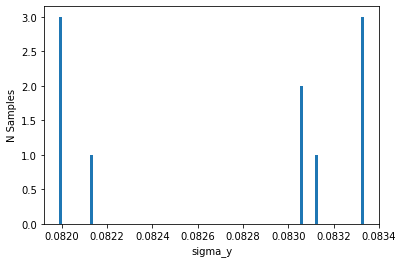

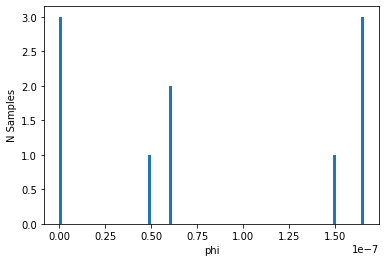

In [8]:
print(estimator.accept_fraction())
print(estimator.current_loglike)
estimator.plot_samples()
estimator.plot_hist()

Current Log Marginal Likelihood: -4653748.138675252
Standard deviation of validation residuals: dx 19.853, dy 18.528
Standard deviation of Gaussian Process residuals: dx 17.515, dy 14.154
The ratio of validation residuals over GP residuals is: dx 1.133, dy 1.309


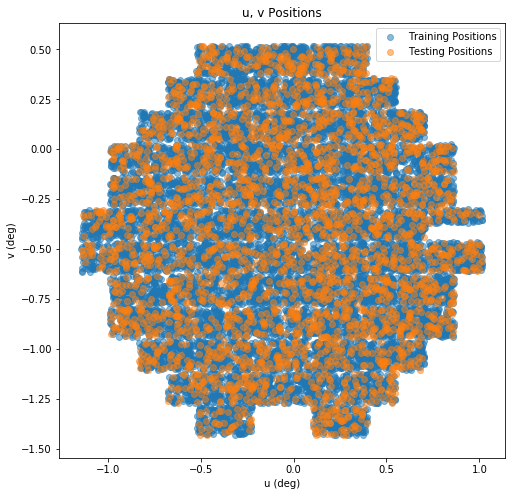

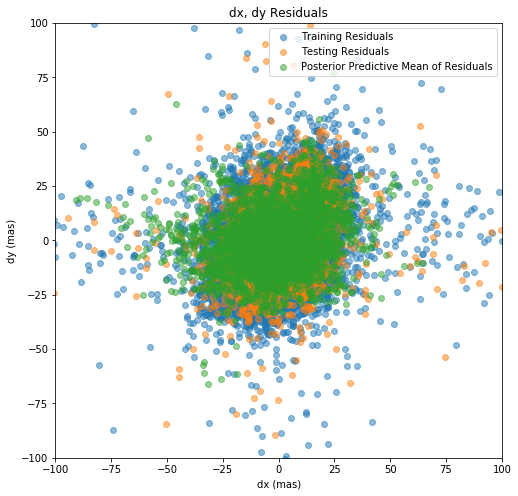

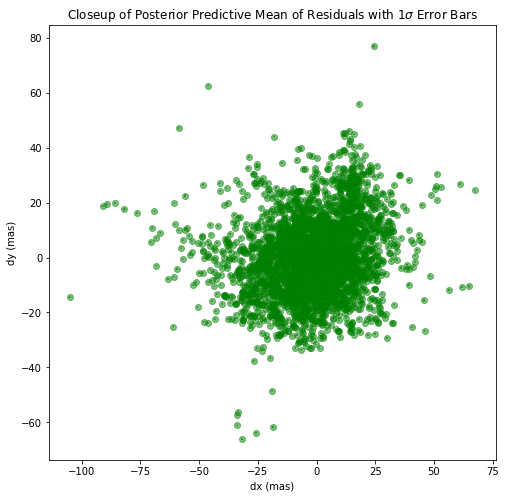

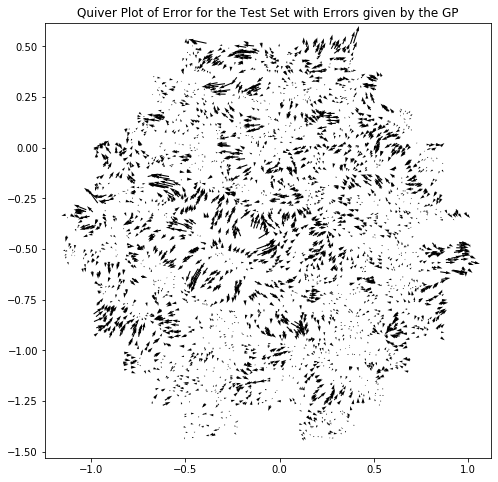

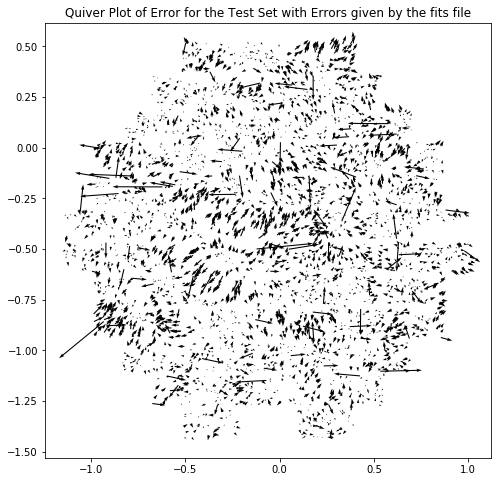

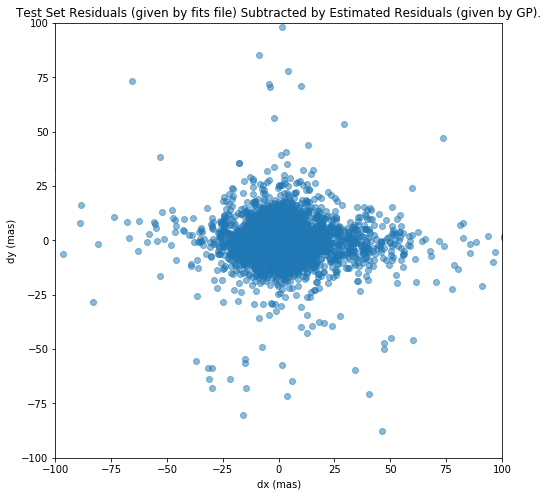

In [9]:
GP = gpr.GPR(datafile, nExposure, sample=sample, verbose=False, test_size=0.2, random_state=0)
GP.fit(estimator.get_samples()[-1])
GP.summary()